In [ ]:
#資料預處理

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist

In [3]:
(x_train_image, y_train_label), \
(x_test_image, y_test_label) = mnist.load_data()

In [4]:
x_train_image.shape

(60000, 28, 28)

In [5]:
y_train_label.shape

(60000,)

In [6]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [7]:
#建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense

In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [11]:
model.add(Dense(units=150,  
                kernel_initializer='normal', 
                activation='relu'))

In [12]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [13]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               38550     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 241,020
Trainable params: 241,020
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
#訓練模型

In [15]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 7s - loss: 0.4880 - accuracy: 0.8719 - val_loss: 0.2068 - val_accuracy: 0.9426
Epoch 2/20
 - 2s - loss: 0.1848 - accuracy: 0.9467 - val_loss: 0.1541 - val_accuracy: 0.9542
Epoch 3/20
 - 2s - loss: 0.1290 - accuracy: 0.9622 - val_loss: 0.1214 - val_accuracy: 0.9647
Epoch 4/20
 - 2s - loss: 0.0964 - accuracy: 0.9718 - val_loss: 0.1062 - val_accuracy: 0.9677
Epoch 5/20
 - 2s - loss: 0.0737 - accuracy: 0.9787 - val_loss: 0.0961 - val_accuracy: 0.9707
Epoch 6/20
 - 2s - loss: 0.0596 - accuracy: 0.9820 - val_loss: 0.0992 - val_accuracy: 0.9723
Epoch 7/20
 - 2s - loss: 0.0475 - accuracy: 0.9858 - val_loss: 0.0864 - val_accuracy: 0.9755
Epoch 8/20
 - 2s - loss: 0.0383 - accuracy: 0.9889 - val_loss: 0.0881 - val_accuracy: 0.9752
Epoch 9/20
 - 2s - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.0902 - val_accuracy: 0.9743
Epoch 10/20
 - 2s - loss: 0.0231 - accuracy: 0.9937 - val_loss: 0.0834 - val_accuracy: 0.9767
Epoch 11/20
 - 2s -

In [17]:
#以圖形顯示訓練過程

In [18]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

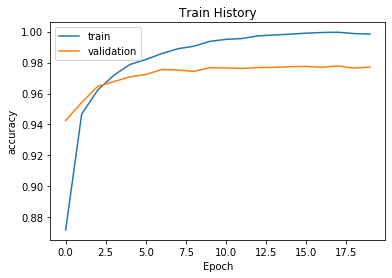

In [19]:
show_train_history(train_history,'accuracy','val_accuracy')

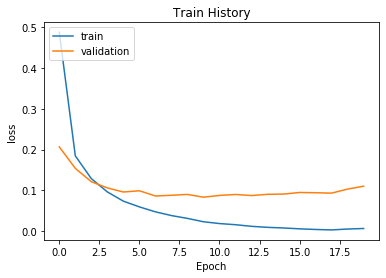

In [20]:
show_train_history(train_history,'loss','val_loss')

In [21]:
#評估模型準確率

In [22]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 67us/step

accuracy= 0.9772999882698059


In [23]:
#進行預測

In [24]:
prediction=model.predict_classes(x_Test)

In [25]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [26]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

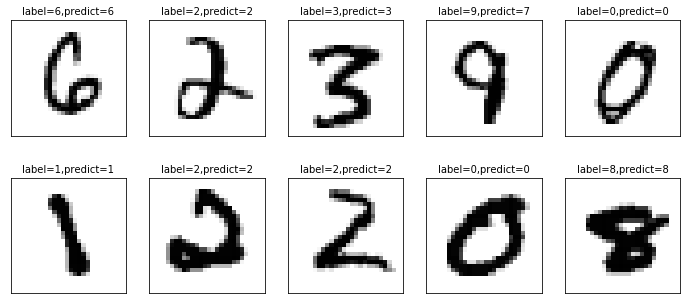

In [27]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=989)

In [28]:
#confusion matrix

In [29]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,969,2,1,1,2,1,1,0,2,1
1,0,1125,4,1,0,1,1,1,2,0
2,2,1,1011,7,1,0,0,8,2,0
3,1,0,2,991,0,2,0,4,3,7
4,2,2,2,1,952,1,4,6,0,12
5,3,0,0,19,1,857,3,2,3,4
6,7,3,2,2,3,6,935,0,0,0
7,0,2,4,3,0,0,0,1016,0,3
8,8,1,10,7,7,1,2,11,923,4


In [30]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [31]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1082,5,3
1393,5,3
1670,5,3
2035,5,3
2291,5,3
2526,5,3
2597,5,3
2810,5,3


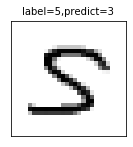

In [32]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1670,num=1)

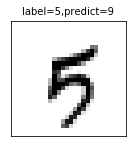

In [33]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)